In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


In [3]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


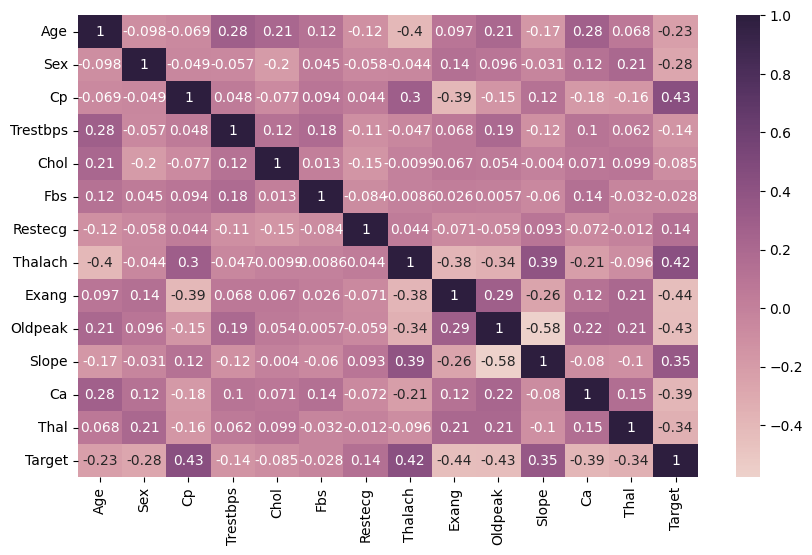

In [9]:
import seaborn as sns #statist graph package
import matplotlib.pyplot as plt #plot package

h_labels = [x.replace('_', ' ').title() for x in
            list(df.select_dtypes(include=['number', 'bool']).columns.values)]

fig, ax = plt.subplots(figsize=(10,6))
_ = sns.heatmap(df.corr(), annot=True, xticklabels=h_labels, yticklabels=h_labels, cmap=sns.cubehelix_palette(as_cmap=True), ax=ax)


In [10]:
df.count()

age         303
sex         303
cp          303
trestbps    303
chol        303
fbs         303
restecg     303
thalach     303
exang       303
oldpeak     303
slope       303
ca          303
thal        303
target      303
dtype: int64

In [11]:
df.target.value_counts()


target
1    165
0    138
Name: count, dtype: int64

In [13]:
countNoDisease = len(df[df.target == 0])
countHaveDisease = len(df[df.target == 1])
print("Percentage of Patients Haven't Heart Disease: {:.2f}%".format((countNoDisease / (len(df.target))*100)))
print("Percentage of Patients Have Heart Disease: {:.2f}%".format((countHaveDisease / (len(df.target))*100)))

Percentage of Patients Haven't Heart Disease: 45.54%
Percentage of Patients Have Heart Disease: 54.46%


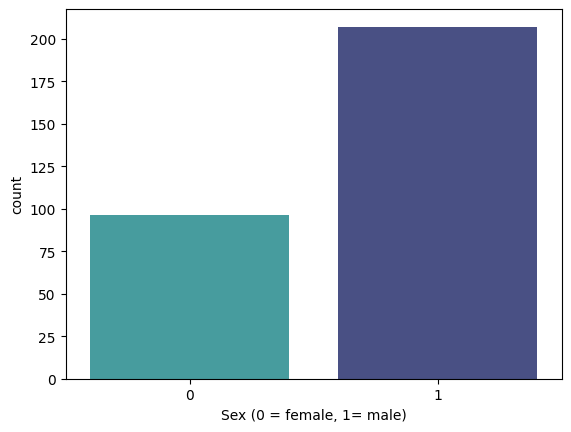

In [14]:
sns.countplot(x='sex', data=df, palette="mako_r")
plt.xlabel("Sex (0 = female, 1= male)")
plt.show()


In [15]:
countFemale = len(df[df.sex == 0])
countMale = len(df[df.sex == 1])
print("Percentage of Female Patients: {:.2f}%".format((countFemale / (len(df.sex))*100)))
print("Percentage of Male Patients: {:.2f}%".format((countMale / (len(df.sex))*100)))

Percentage of Female Patients: 31.68%
Percentage of Male Patients: 68.32%


In [16]:
df.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212


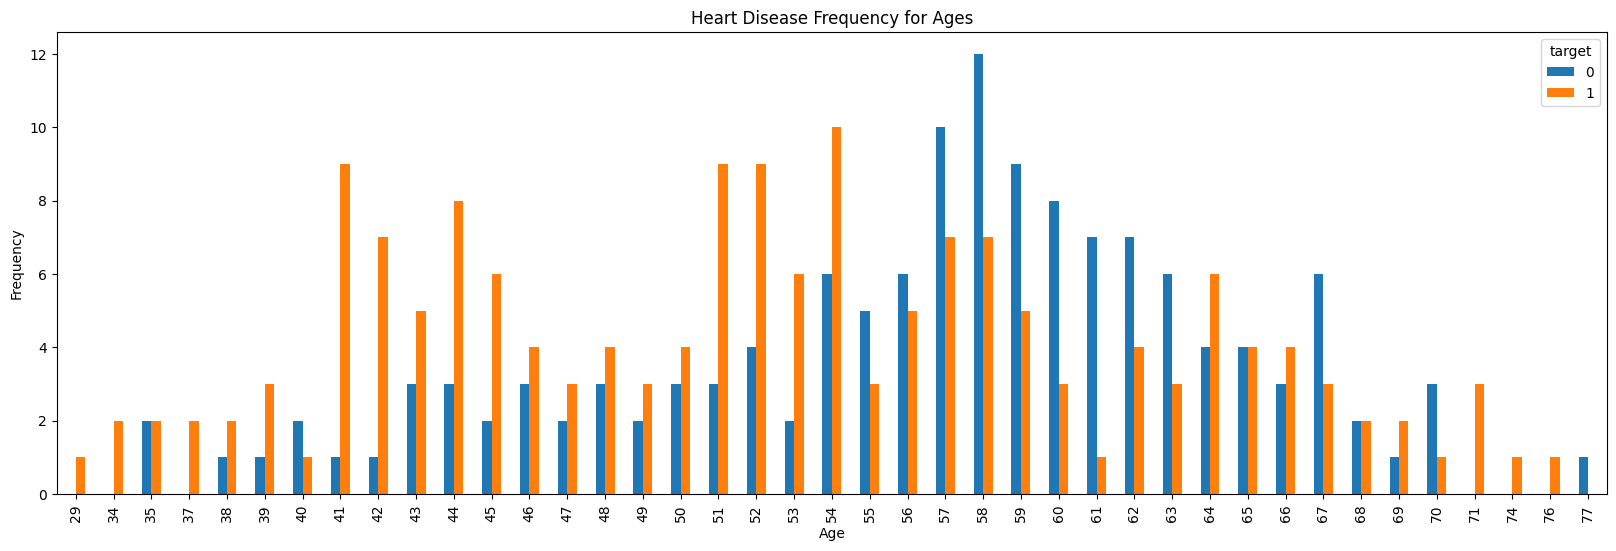

In [17]:
pd.crosstab(df.age,df.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()


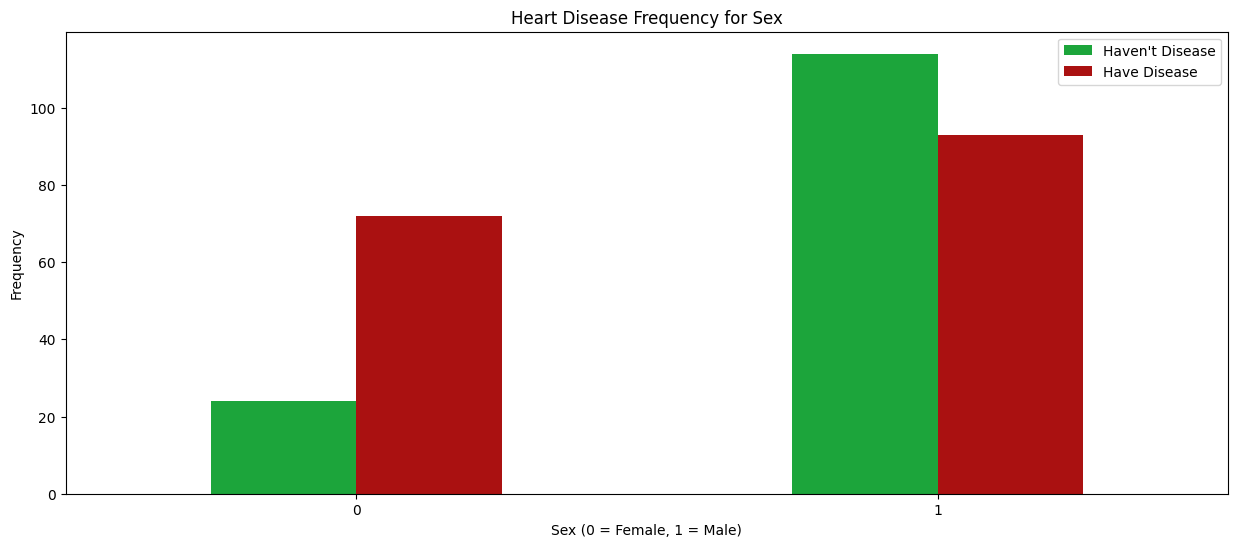

In [18]:
pd.crosstab(df.sex,df.target).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

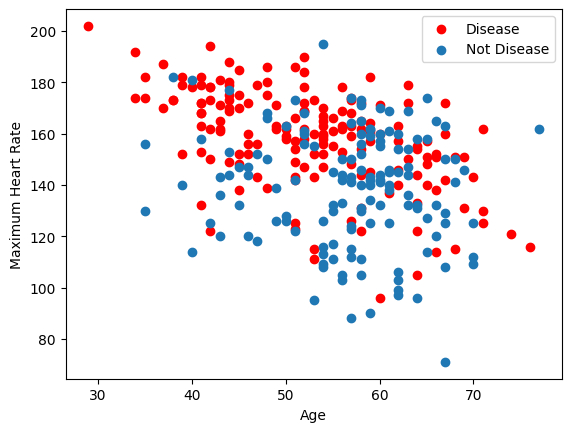

In [19]:
plt.scatter(x=df.age[df.target==1], y=df.thalach[(df.target==1)], c="red")
plt.scatter(x=df.age[df.target==0], y=df.thalach[(df.target==0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

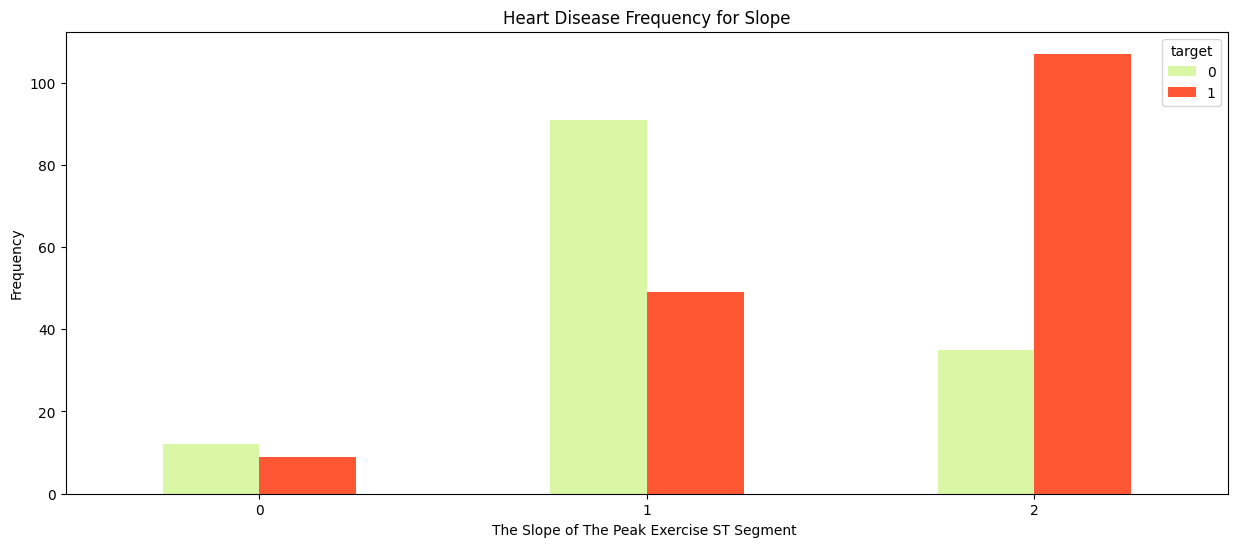

In [20]:
pd.crosstab(df.slope,df.target).plot(kind="bar",figsize=(15,6),color=['#DAF7A6','#FF5733' ])
plt.title('Heart Disease Frequency for Slope')
plt.xlabel('The Slope of The Peak Exercise ST Segment ')
plt.xticks(rotation = 0)
plt.ylabel('Frequency')
plt.show()

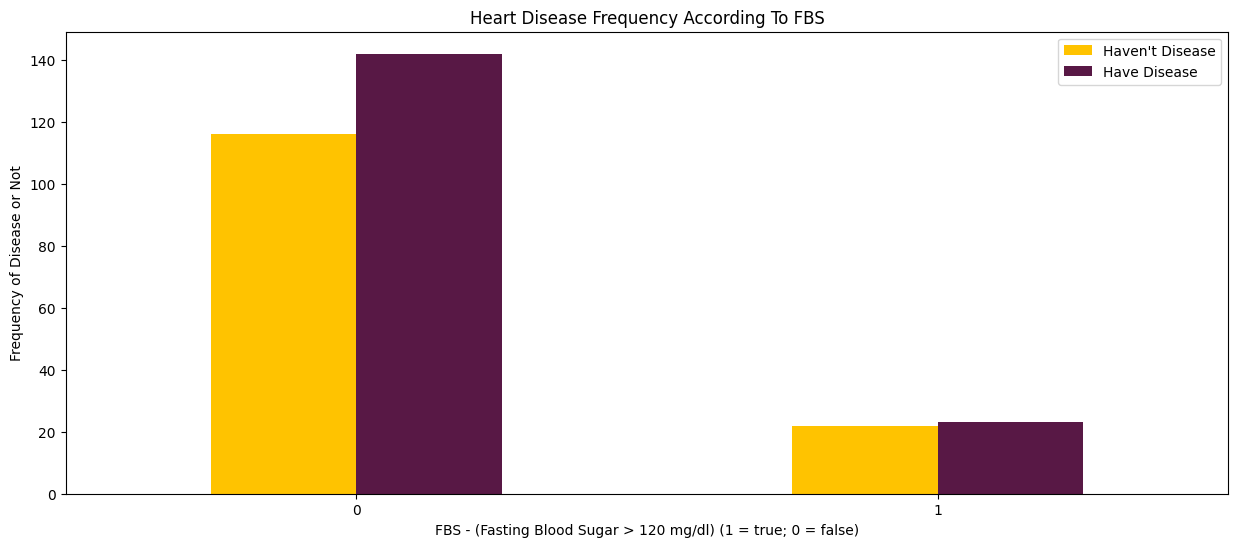

In [21]:
pd.crosstab(df.fbs,df.target).plot(kind="bar",figsize=(15,6),color=['#FFC300','#581845' ])
plt.title('Heart Disease Frequency According To FBS')
plt.xlabel('FBS - (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation = 0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency of Disease or Not')
plt.show()

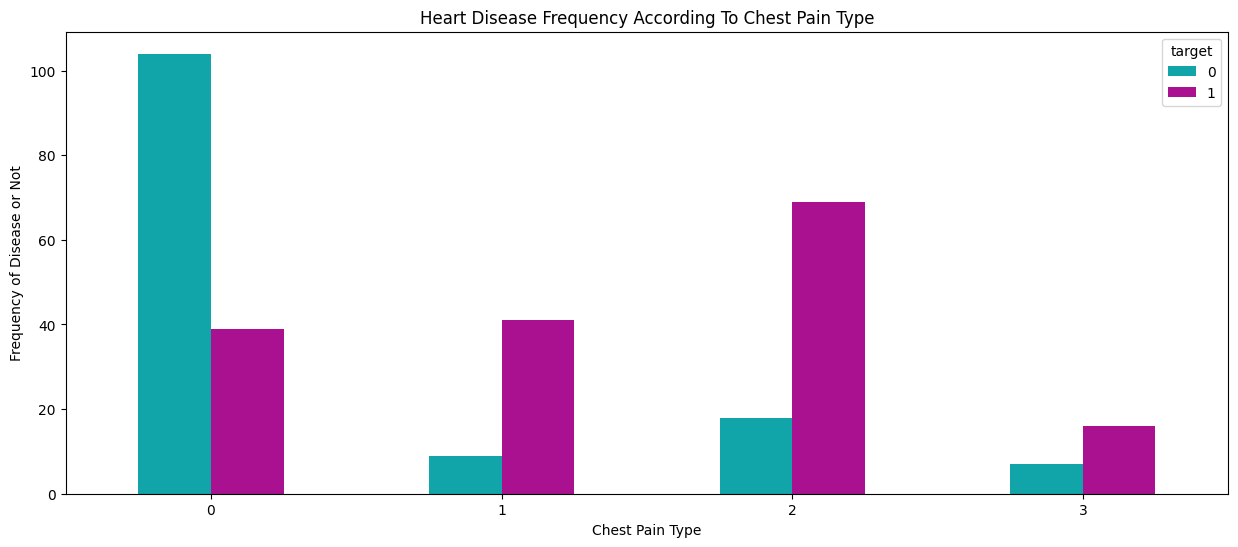

In [22]:
pd.crosstab(df.cp,df.target).plot(kind="bar",figsize=(15,6),color=['#11A5AA','#AA1190' ])
plt.title('Heart Disease Frequency According To Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Disease or Not')
plt.show()

In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
def generateClassificationReport(y_test,y_pred):
    print(classification_report(y_test,y_pred))
    print(confusion_matrix(y_test,y_pred))
    print('accuracy is ',accuracy_score(y_test,y_pred))
tmpData=df


In [26]:
#0.1 SEPARATING THE DEPENDENT AND INDEPENDENT VARIABLES ( x, y )
y = tmpData.target.values
x = tmpData.drop(['target'], axis = 1)
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=0)
#0.2 Performs data Normalization using StandardScaler
scaler = StandardScaler()
#0.3 Fit only to the training data
scaler.fit(x_train)
StandardScaler(copy=True, with_mean=True, with_std=True)
#0.4 Now apply the transformations to the data:
x_Train = scaler.transform(x_train)
x_Test = scaler.transform(x_test)

Iteration 1, loss = 0.45088899
Iteration 2, loss = 0.48727407
Iteration 3, loss = 0.37040336
Iteration 4, loss = 0.31336842
Iteration 5, loss = 0.32141105
Iteration 6, loss = 0.28995046
Iteration 7, loss = 0.42712553
Iteration 8, loss = 0.36429378
Iteration 9, loss = 0.35331932
Iteration 10, loss = 0.30894003
Iteration 11, loss = 0.18628307
Iteration 12, loss = 0.12516106
Iteration 13, loss = 0.11150471
Iteration 14, loss = 0.10288992
Iteration 15, loss = 0.06553222
Iteration 16, loss = 0.05354630
Iteration 17, loss = 0.04973739
Iteration 18, loss = 0.03600180
Iteration 19, loss = 0.03421113
Iteration 20, loss = 0.03253730
Iteration 21, loss = 0.02877802
Iteration 22, loss = 0.01895718
Iteration 23, loss = 0.01541017
Iteration 24, loss = 0.01172454
Iteration 25, loss = 0.01047878
Iteration 26, loss = 0.00836412
Iteration 27, loss = 0.00815915
Iteration 28, loss = 0.00742406
Iteration 29, loss = 0.00615424
Iteration 30, loss = 0.00654239
Iteration 31, loss = 0.00572026
Iteration 32, los

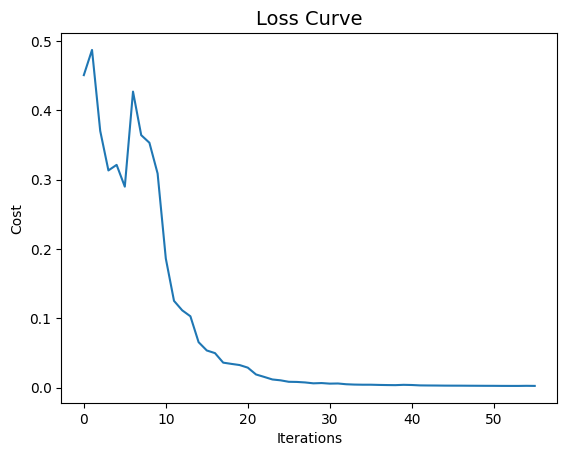


*** PREDICTION TRAINING ***
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       111
           1       1.00      1.00      1.00       131

    accuracy                           1.00       242
   macro avg       1.00      1.00      1.00       242
weighted avg       1.00      1.00      1.00       242

[[111   0]
 [  0 131]]
accuracy is  1.0

*** PREDICTION TESTING ***
              precision    recall  f1-score   support

           0       0.79      0.85      0.82        27
           1       0.88      0.82      0.85        34

    accuracy                           0.84        61
   macro avg       0.83      0.84      0.83        61
weighted avg       0.84      0.84      0.84        61

[[23  4]
 [ 6 28]]
accuracy is  0.8360655737704918


In [28]:
accuracies={}

#1. CREATE ANN
mlp_sgd = MLPClassifier(learning_rate_init=0.25, activation='relu',hidden_layer_sizes=(64), max_iter=500, alpha=1e-4,
                    solver='sgd', verbose=1, tol=1e-4, random_state=1,batch_size=20)

#2. TRAINNING
mlp_sgd.fit(x_Train,y_train)
print(mlp_sgd)

#Plot Error
plt.plot(mlp_sgd.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

#3. Testing Model
print("\n*** PREDICTION TRAINING ***" )
y_pred = mlp_sgd.predict(x_Train)
generateClassificationReport(y_train,y_pred)

print("\n*** PREDICTION TESTING ***" )
y_pred = mlp_sgd.predict(x_Test)
generateClassificationReport(y_test,y_pred)

accuracies['SGD'] = 100*mlp_sgd.score(x_Test, y_test)

Iteration 1, loss = 1.57194633
Iteration 2, loss = 1.21063522
Iteration 3, loss = 1.81229729
Iteration 4, loss = 1.00196872
Iteration 5, loss = 0.52042479
Iteration 6, loss = 0.56803049
Iteration 7, loss = 0.60979648
Iteration 8, loss = 0.30199705
Iteration 9, loss = 0.37161553
Iteration 10, loss = 0.35115816
Iteration 11, loss = 0.32186157
Iteration 12, loss = 0.59554724
Iteration 13, loss = 0.75153358
Iteration 14, loss = 0.62206420
Iteration 15, loss = 0.78934856
Iteration 16, loss = 0.86050819
Iteration 17, loss = 0.33967264
Iteration 18, loss = 0.28853248
Iteration 19, loss = 0.26490027
Iteration 20, loss = 0.30904128
Iteration 21, loss = 0.44496820
Iteration 22, loss = 0.15392362
Iteration 23, loss = 0.32360590
Iteration 24, loss = 0.25792836
Iteration 25, loss = 0.61388709
Iteration 26, loss = 0.40040480
Iteration 27, loss = 0.24832588
Iteration 28, loss = 0.36631661
Iteration 29, loss = 0.36164960
Iteration 30, loss = 0.21869727
Iteration 31, loss = 0.20566519
Iteration 32, los

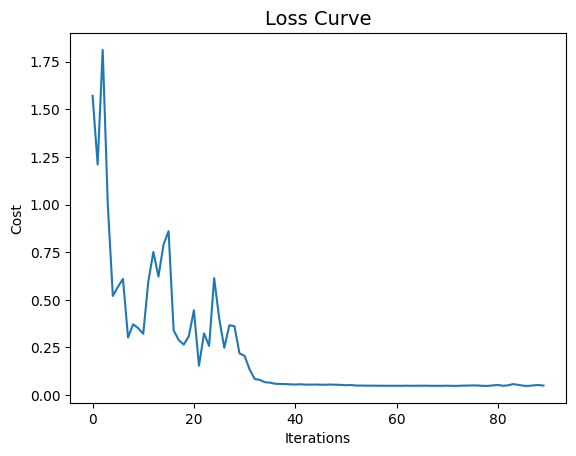


*** PREDICTION TRAINING ***
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       111
           1       1.00      0.96      0.98       131

    accuracy                           0.98       242
   macro avg       0.98      0.98      0.98       242
weighted avg       0.98      0.98      0.98       242

[[111   0]
 [  5 126]]
accuracy is  0.9793388429752066

*** PREDICTION TESTING ***
              precision    recall  f1-score   support

           0       0.82      0.85      0.84        27
           1       0.88      0.85      0.87        34

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61

[[23  4]
 [ 5 29]]
accuracy is  0.8524590163934426


In [29]:
#1. CREATE ANN
mlp_adam = MLPClassifier(learning_rate_init=0.25, activation='relu',hidden_layer_sizes=(60), max_iter=500, alpha=1e-4,
                    solver='adam', verbose=1, tol=1e-4, random_state=1,batch_size=20)

#2. TRAINNING
mlp_adam.fit(x_Train,y_train)
print(mlp_adam)

#Plot Error
plt.plot(mlp_adam.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

#3. PREDICTION
print("\n*** PREDICTION TRAINING ***" )
y_pred = mlp_adam.predict(x_Train)
generateClassificationReport(y_train,y_pred)

print("\n*** PREDICTION TESTING ***" )
y_pred = mlp_adam.predict(x_Test)
generateClassificationReport(y_test,y_pred)

accuracies['Adam'] = 100*mlp_adam.score(x_Test, y_test)

In [31]:
#1. CREATE ANN
mlp_QNew = MLPClassifier(learning_rate_init=0.25, activation='logistic',
                         hidden_layer_sizes=(50, 10),
                         solver='lbfgs', verbose=0, tol=1e-4,
                         random_state=1, batch_size=20)

#2. TRAINING
mlp_QNew.fit(x_Train, y_train)
print(mlp_QNew)

#3. PREDICTION
print("\n*** PREDICTION TRAINING ***")
y_pred = mlp_QNew.predict(x_Train)
generateClassificationReport(y_train, y_pred)

print("\n*** PREDICTION TESTING ***")
y_pred = mlp_QNew.predict(x_Test)
generateClassificationReport(y_test, y_pred)

accuracies['QNew'] = 100 * mlp_QNew.score(x_Test, y_test)


MLPClassifier(activation='logistic', batch_size=20, hidden_layer_sizes=(50, 10),
              learning_rate_init=0.25, random_state=1, solver='lbfgs',
              verbose=0)

*** PREDICTION TRAINING ***
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       111
           1       1.00      1.00      1.00       131

    accuracy                           1.00       242
   macro avg       1.00      1.00      1.00       242
weighted avg       1.00      1.00      1.00       242

[[111   0]
 [  0 131]]
accuracy is  1.0

*** PREDICTION TESTING ***
              precision    recall  f1-score   support

           0       0.87      0.96      0.91        27
           1       0.97      0.88      0.92        34

    accuracy                           0.92        61
   macro avg       0.92      0.92      0.92        61
weighted avg       0.92      0.92      0.92        61

[[26  1]
 [ 4 30]]
accuracy is  0.9180327868852459


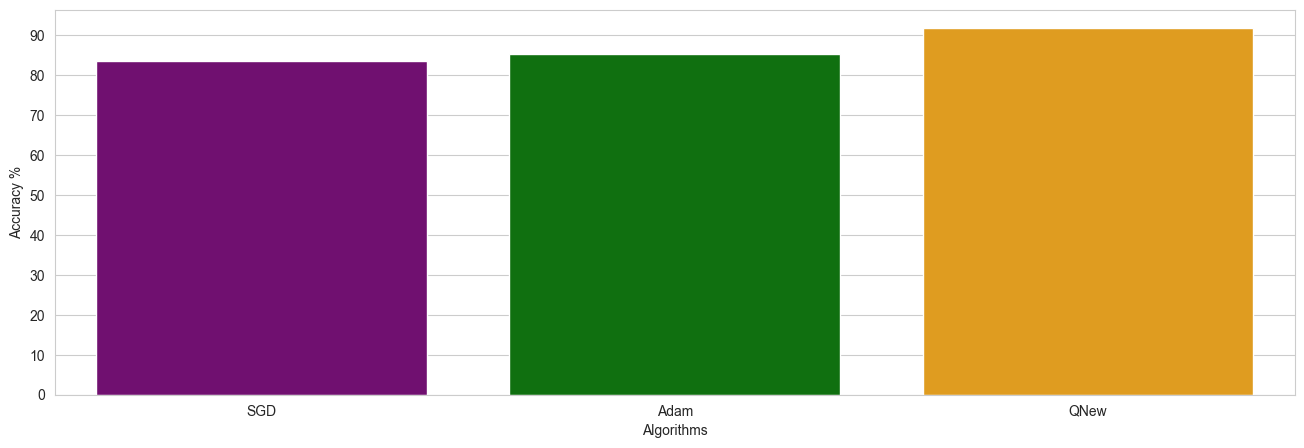

In [32]:
colors = ["purple", "green", "orange"]
sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.show()


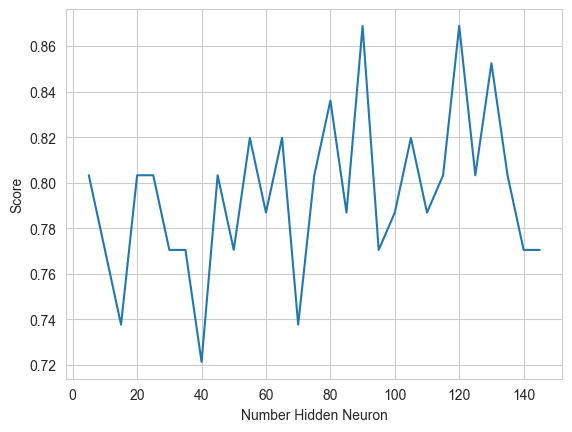

Maximum ML Score is 86.89%


In [36]:
# try to find best hidden layer
scoreList = []
listHL = []
nHL = 5

for i in range(1, 30):
    mlp_nHL = MLPClassifier(learning_rate_init=0.25, activation='logistic',
                            hidden_layer_sizes=(nHL,),
                            solver='lbfgs', verbose=0, tol=1e-4,
                            random_state=1, batch_size=20)
    #2. TRAINING
    mlp_nHL.fit(x_Train, y_train)
    scoreList.append(mlp_nHL.score(x_Test, y_test))
    listHL.append(nHL)
    nHL = nHL + 5

plt.plot(listHL, scoreList)
#plt.xticks(np.arange(listHL))
plt.xlabel("Number Hidden Neuron")
plt.ylabel("Score")
plt.show()

acc = max(scoreList) * 100
print("Maximum ML Score is {:.2f}%".format(acc))


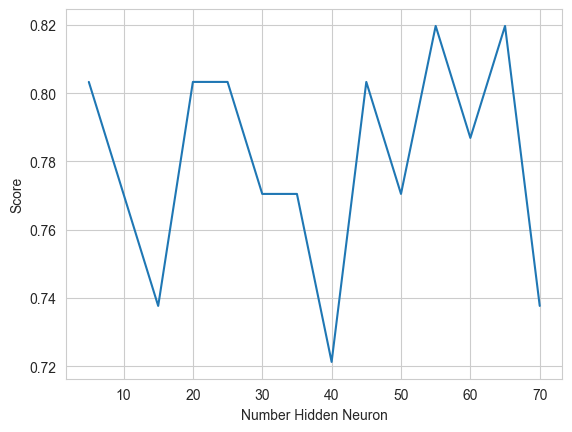

Maximum ML Score is 81.97%


In [37]:
# try to find best hidden layer
scoreList = []
listHL = []
nHL = 5

for i in range(1, 15):
    mlp_nHL = MLPClassifier(learning_rate_init=0.25, activation='logistic',
                            hidden_layer_sizes=(nHL,),
                            solver='lbfgs', verbose=0, tol=1e-4,
                            random_state=1, batch_size=20)
    #2. TRAINING
    mlp_nHL.fit(x_Train, y_train)
    scoreList.append(mlp_nHL.score(x_Test, y_test))
    listHL.append(nHL)
    nHL = nHL + 5

plt.plot(listHL, scoreList)
#plt.xticks(np.arange(listHL))
plt.xlabel("Number Hidden Neuron")
plt.ylabel("Score")
plt.show()

acc = max(scoreList) * 100
print("Maximum ML Score is {:.2f}%".format(acc))


In [38]:
accuracies_new = {}

#1. CREATE ANN
mlp_QNew = MLPClassifier(learning_rate_init=0.25, activation='logistic',
                         hidden_layer_sizes=(90, 10),
                         solver='lbfgs', verbose=0, tol=1e-4,
                         random_state=1, batch_size=20)

#2. TRAINING
mlp_QNew.fit(x_Train, y_train)
print(mlp_QNew)

#3. PREDICTION
print("\n*** PREDICTION TRAINING ***")
y_pred = mlp_QNew.predict(x_Train)
generateClassificationReport(y_train, y_pred)

print("\n*** PREDICTION TESTING ***")
y_pred = mlp_QNew.predict(x_Test)
generateClassificationReport(y_test, y_pred)

accuracies_new['QNew'] = 100 * mlp_QNew.score(x_Test, y_test)


MLPClassifier(activation='logistic', batch_size=20, hidden_layer_sizes=(90, 10),
              learning_rate_init=0.25, random_state=1, solver='lbfgs',
              verbose=0)

*** PREDICTION TRAINING ***
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       111
           1       1.00      1.00      1.00       131

    accuracy                           1.00       242
   macro avg       1.00      1.00      1.00       242
weighted avg       1.00      1.00      1.00       242

[[111   0]
 [  0 131]]
accuracy is  1.0

*** PREDICTION TESTING ***
              precision    recall  f1-score   support

           0       0.86      0.89      0.87        27
           1       0.91      0.88      0.90        34

    accuracy                           0.89        61
   macro avg       0.88      0.89      0.88        61
weighted avg       0.89      0.89      0.89        61

[[24  3]
 [ 4 30]]
accuracy is  0.8852459016393442


In [39]:
accuracies = {}
lr = LogisticRegression()
lr.fit(x_Train,y_train)
acc = lr.score(x_Test,y_test)*100
accuracies_new['Logistic Regression'] = acc
print("Test Accuracy {:.2f}%".format(acc))


Test Accuracy 85.25%


In [40]:
# KNN Model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 2) # n_neighbors means k
knn.fit(x_Train, y_train)
prediction = knn.predict(x_Test)
print("{} NN Score: {:.2f}%".format(2, knn.score(x_test, y_test)*100))

2 NN Score: 59.02%


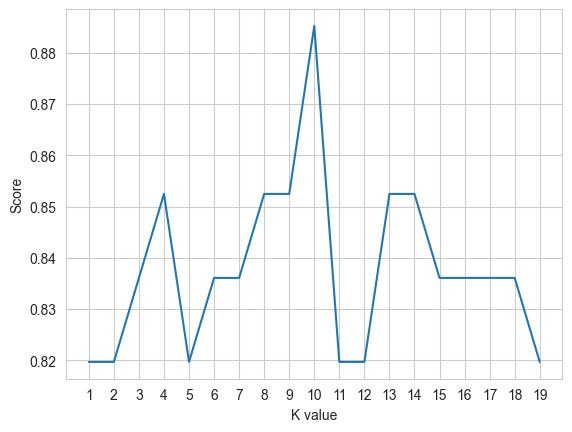

Maximum KNN Score is 88.52%


In [42]:
# try ro find best k value
scoreList = []
for i in range(1,20):
    knn2 = KNeighborsClassifier(n_neighbors = i) # n_neighbors means k
    knn2.fit(x_Train, y_train)
    scoreList.append(knn2.score(x_Test, y_test))
plt.plot(range(1,20), scoreList)
plt.xticks(np.arange(1,20,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()
acc = max(scoreList)*100
accuracies_new['KNN'] = acc
print("Maximum KNN Score is {:.2f}%".format(acc))